In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier

/tmp/ipykernel_4307/1890908085.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,NaN,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.head

<bound method NDFrame.head of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female        NaN  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2110.0,24.314170,6.347063,14.00,19.946718,22.783646,26.000000,61.00
Height,2107.0,1.701804,0.093297,1.45,1.630000,1.700627,1.768536,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2110.0,2.419242,0.533975,1.00,2.000000,2.386464,3.000000,3.00
NCP,2110.0,2.686427,0.777357,1.00,2.660328,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2109.0,1.009833,0.849607,0.00,0.127425,1.000000,1.666390,3.00
TUE,2110.0,0.657230,0.608370,0.00,0.000000,0.625350,1.000000,2.00


Text(0, 0.5, 'Value')

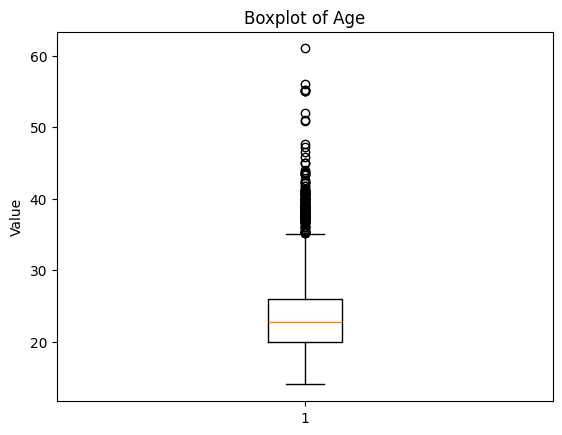

In [7]:
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')
plt.ylabel('Value')
#plt.grid()

In [8]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [9]:
df['NObeyesdad'].replace({'Normal_Weight' : 0 , 'Obesity_Type_I' : 1, 'Obesity_Type_II' : 2, 'Obesity_Type_III' : 3, 'Overweight_Level_I' : 4, 'Overweight_Level_II' : 5, 'Insufficient_Weight' : 6}, inplace=True)
df

/tmp/ipykernel_4307/2776719712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NObeyesdad'].replace({'Normal_Weight' : 0 , 'Obesity_Type_I' : 1, 'Obesity_Type_II' : 2, 'Obesity_Type_III' : 3, 'Overweight_Level_I' : 4, 'Overweight_Level_II' : 5, 'Insufficient_Weight' : 6}, inplace=True)
/tmp/ipykernel_4307/2776719712.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,NaN,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,4
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,3


In [10]:
df['Gender'].replace({'Male' : 1, 'Female' : 0}, inplace=True)
df

/tmp/ipykernel_4307/827309489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male' : 1, 'Female' : 0}, inplace=True)
/tmp/ipykernel_4307/827309489.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male' : 1, 'Female' : 0}, inplace=True)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,4
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,3


In [11]:
df['CAEC'].value_counts()

CAEC
Sometimes     1764
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [12]:
df['CAEC'].replace({'Sometimes' : 0, 'Frequently' : 1, 'Always' : 2, 'no' : 3}, inplace=True)
df

/tmp/ipykernel_4307/1505915041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CAEC'].replace({'Sometimes' : 0, 'Frequently' : 1, 'Always' : 2, 'no' : 3}, inplace=True)
/tmp/ipykernel_4307/1505915041.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAEC'].replace({'Sometimes' : 0, 'Fr

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,yes,no,2.0,3.0,0.0,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,0.0,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,0.0,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,0.0,no,2.000000,no,2.000000,0.000000,Frequently,Walking,4
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,0.0,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,0.0,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,0.0,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,0.0,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,0.0,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,3


In [13]:
df['SCC'].value_counts()

SCC
no     2015
yes      95
Name: count, dtype: int64

In [14]:
df['SCC'].replace({'no' : 0, 'yes' : 1}, inplace=True)
df

/tmp/ipykernel_4307/346105343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SCC'].replace({'no' : 0, 'yes' : 1}, inplace=True)
/tmp/ipykernel_4307/346105343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SCC'].replace({'no' : 0, 'yes' : 1}, inplace=True)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,yes,no,2.0,3.0,0.0,no,2.000000,0.0,0.000000,1.000000,no,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,0.0,yes,3.000000,1.0,3.000000,0.000000,Sometimes,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,0.0,no,2.000000,0.0,2.000000,1.000000,Frequently,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,0.0,no,2.000000,0.0,2.000000,0.000000,Frequently,Walking,4
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,0.0,no,2.000000,0.0,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,0.0,no,1.728139,0.0,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,0.0,no,2.005130,0.0,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,0.0,no,2.054193,0.0,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,0.0,no,2.852339,0.0,1.139107,0.586035,Sometimes,Public_Transportation,3


In [15]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1725
no      385
Name: count, dtype: int64

In [16]:
df['family_history_with_overweight'].replace({'no' : 0, 'yes' : 1}, inplace=True)
df

/tmp/ipykernel_4307/945658629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['family_history_with_overweight'].replace({'no' : 0, 'yes' : 1}, inplace=True)
/tmp/ipykernel_4307/945658629.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history_with_overweight'].replace({'no' : 0

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,no,2.0,3.0,0.0,no,2.000000,0.0,0.000000,1.000000,no,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,1.0,no,3.0,3.0,0.0,yes,3.000000,1.0,3.000000,0.000000,Sometimes,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,1.0,no,2.0,3.0,0.0,no,2.000000,0.0,2.000000,1.000000,Frequently,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,0.0,no,3.0,3.0,0.0,no,2.000000,0.0,2.000000,0.000000,Frequently,Walking,4
4,1,22.000000,1.780000,89.800000,0.0,no,2.0,1.0,0.0,no,2.000000,0.0,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,yes,3.0,3.0,0.0,no,1.728139,0.0,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,1.0,yes,3.0,3.0,0.0,no,2.005130,0.0,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,1.0,yes,3.0,3.0,0.0,no,2.054193,0.0,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,1.0,yes,3.0,3.0,0.0,no,2.852339,0.0,1.139107,0.586035,Sometimes,Public_Transportation,3


In [17]:
df['FAVC'].value_counts()

FAVC
yes    1865
no      244
Name: count, dtype: int64

In [18]:
df['FAVC'].replace({'no' : 0, 'yes' : 1}, inplace=True)
df

/tmp/ipykernel_4307/2851624333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FAVC'].replace({'no' : 0, 'yes' : 1}, inplace=True)
/tmp/ipykernel_4307/2851624333.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'].replace({'no' : 0, 'yes' : 1}, inplace=True)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,no,2.000000,0.0,0.000000,1.000000,no,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,yes,3.000000,1.0,3.000000,0.000000,Sometimes,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,no,2.000000,0.0,2.000000,1.000000,Frequently,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,no,2.000000,0.0,2.000000,0.000000,Frequently,Walking,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,no,2.000000,0.0,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,no,1.728139,0.0,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,no,2.005130,0.0,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,no,2.054193,0.0,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,no,2.852339,0.0,1.139107,0.586035,Sometimes,Public_Transportation,3


In [19]:
df['SMOKE'].replace({'no' : 0, 'yes' : 1}, inplace=True)
df

/tmp/ipykernel_4307/1492030660.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SMOKE'].replace({'no' : 0, 'yes' : 1}, inplace=True)
/tmp/ipykernel_4307/1492030660.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SMOKE'].replace({'no' : 0, 'yes' : 1}, inplace=True)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,no,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,Sometimes,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,Frequently,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,Frequently,Walking,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,Sometimes,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,Sometimes,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,Sometimes,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,Sometimes,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,Sometimes,Public_Transportation,3


In [20]:
df['CALC'].value_counts()

CALC
Sometimes     1398
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [21]:
df['CALC'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}, inplace=True)
df

/tmp/ipykernel_4307/3221968348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CALC'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}, inplace=True)
/tmp/ipykernel_4307/3221968348.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CALC'].replace({'no' : 0, 'Sometimes

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,Public_Transportation,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,Public_Transportation,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,Public_Transportation,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,Walking,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,Public_Transportation,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,Public_Transportation,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,Public_Transportation,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,Public_Transportation,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,Public_Transportation,3


In [22]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1578
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [23]:
df['MTRANS'].replace({'Public_Transportation' : 0, 'Automobile' : 1, 'Walking' : 2, 'Motorbike' : 3, 'Bike' : 4}, inplace=True)
df

/tmp/ipykernel_4307/3036664274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MTRANS'].replace({'Public_Transportation' : 0, 'Automobile' : 1, 'Walking' : 2, 'Motorbike' : 3, 'Bike' : 4}, inplace=True)
/tmp/ipykernel_4307/3036664274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MT

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,0.0,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3


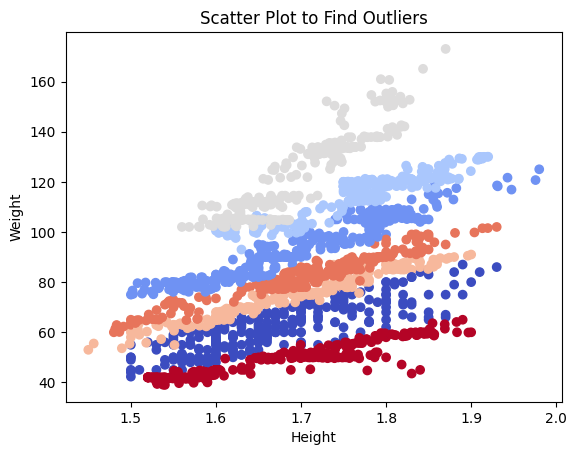

In [24]:
plt.title('Scatter Plot to Find Outliers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(df['Height'], df['Weight'], c = df['NObeyesdad'], cmap='coolwarm')
#plt.grid()
plt.show()

In [25]:
df.iloc[1:5]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0,0.0,0
2,1,23.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,0.0,0
3,1,27.0,1.80,87.0,0.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,4
4,1,22.0,1.78,89.8,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,5


In [26]:
df.iloc[1,2]

1.52

In [27]:
pd.get_dummies(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,0.0,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3


In [28]:
df = df[df['Height'].between(-26, 36) | pd.isna(df['Height'])]
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,0.0,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3


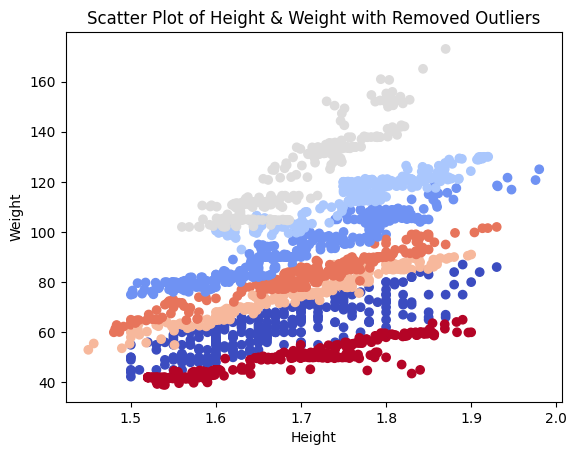

In [29]:
plt.title('Scatter Plot of Height & Weight with Removed Outliers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(df['Height'], df['Weight'], c = df['NObeyesdad'], cmap='coolwarm')
plt.show()

In [30]:
df[df.duplicated(keep=False)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
105,0,25.0,1.57,55.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0
106,0,25.0,1.57,55.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0
145,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
174,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
179,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
184,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
208,0,22.0,1.69,65.0,1.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0
209,0,22.0,1.69,65.0,1.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0
282,0,18.0,1.62,55.0,1.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
295,0,16.0,1.66,58.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0


In [31]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
106,0,25.0,1.57,55.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0
174,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
179,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
184,1,21.0,1.62,70.0,0.0,1.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,4
209,0,22.0,1.69,65.0,1.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0
309,0,16.0,1.66,58.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0
460,0,18.0,1.62,55.0,1.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
467,1,22.0,1.74,75.0,1.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
496,1,18.0,1.72,53.0,1.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,6
527,0,21.0,1.52,42.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6


In [32]:
df.drop_duplicates(keep='first', inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,0.0,0
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3


In [33]:
df['Height'].isnull().sum()

4

In [34]:
f2_mean = df['Height'].mean()
df['Feature2'] = df['Height'].fillna(f2_mean)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Feature2
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,0.0,0,1.620000
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0,1.520000
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0,1.800000
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4,1.800000
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5,1.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3,1.710730
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3,1.748584
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3,1.752206
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3,1.739450


In [35]:
df['Weight'].isnull().sum()

0

In [36]:
f1_mean = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(f2_mean)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Feature2
0,0,NaN,1.620000,64.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,0.0,0,1.620000
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0,1.520000
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0,1.800000
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4,1.800000
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5,1.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3,1.710730
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3,1.748584
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3,1.752206
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3,1.739450


In [37]:
df['Age'].isnull().sum()

1

In [38]:
df.dropna(axis=0, inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Feature2
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0,1.520000
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0,1.800000
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4,1.800000
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5,1.780000
5,1,29.000000,1.620000,53.000000,0.0,1.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,1.0,0,1.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3,1.710730
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3,1.748584
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3,1.752206
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3,1.739450


In [39]:
df['family_history_with_overweight'].isnull().sum()

0

In [40]:
df['FAVC'].isnull().sum()

0

In [41]:
df['FCVC'].isnull().sum()

0

In [42]:
df['NCP'].isnull().sum()

0

In [43]:
df['CAEC'].isnull().sum()

0

In [44]:
df['SMOKE'].isnull().sum()

0

In [45]:
df['CH2O'].isnull().sum()

0

In [46]:
df['SCC'].isnull().sum()

0

In [47]:
df['FAF'].isnull().sum()

0

In [48]:
df['TUE'].isnull().sum()

0

In [49]:
df['CALC'].isnull().sum()

0

In [50]:
df['MTRANS'].isnull().sum()

0

In [51]:
df['NObeyesdad'].isnull().sum()

0

In [52]:
df['Feature2'].isnull().sum()

0

In [53]:
df2 = pd.get_dummies(df)
df2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Feature2
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,0,1.520000
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0,1.800000
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,4,1.800000
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,5,1.780000
5,1,29.000000,1.620000,53.000000,0.0,1.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,1.0,0,1.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,3,1.710730
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,3,1.748584
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,3,1.752206
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,3,1.739450


In [54]:
X = df2.drop(columns='NObeyesdad')
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Feature2
1,0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,0.0,1.520000
2,1,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,1.800000
3,1,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,2.0,1.800000
4,1,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,1.780000
5,1,29.000000,1.620000,53.000000,0.0,1.0,2.0,3.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,1.0,1.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,0.0,1.710730
2107,0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,0.0,1.748584
2108,0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,0.0,1.752206
2109,0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,0.0,1.739450


In [55]:
y = df2['NObeyesdad']
y

1       0
2       0
3       4
4       5
5       0
       ..
2106    3
2107    3
2108    3
2109    3
2110    3
Name: NObeyesdad, Length: 2068, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
print('X shape: ', X.shape)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print()
print('y shape:', y.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X shape:  (2068, 17)
X_train shape:  (1654, 17)
X_test shape:  (414, 17)

y shape: (2068,)
y_train shape:  (1654,)
y_test shape:  (414,)


In [58]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train

array([[1.        , 0.23404255, 0.62264151, ..., 0.33333333, 0.        ,
        0.62264151],
       [0.        , 0.22046672, 0.54613208, ..., 0.33333333, 0.        ,
        0.54613208],
       [1.        , 0.87234043, 0.37735849, ..., 0.        , 0.25      ,
        0.37735849],
       ...,
       [1.        , 0.0856693 , 0.5700434 , ..., 0.        , 0.        ,
        0.5700434 ],
       [0.        , 0.06097838, 0.36613774, ..., 0.        , 0.        ,
        0.36613774],
       [1.        , 0.20735815, 0.57881509, ..., 0.33333333, 0.        ,
        0.57881509]])

In [60]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.234043,0.622642,0.291045,1.0,1.0,0.500000,0.000000,0.0,0.0,0.500000,0.0,0.666667,0.500000,0.333333,0.00,0.622642
1,0.0,0.220467,0.546132,0.704079,1.0,1.0,1.000000,0.666667,0.0,0.0,0.926170,0.0,0.379702,0.293017,0.333333,0.00,0.546132
2,1.0,0.872340,0.377358,0.305970,0.0,1.0,0.500000,0.666667,0.0,0.0,0.500000,0.0,0.333333,0.000000,0.000000,0.25,0.377358
3,1.0,0.169435,0.466468,0.272963,1.0,1.0,0.602457,0.874455,0.0,0.0,0.407647,0.0,0.329772,0.000000,0.333333,0.00,0.466468
4,0.0,0.088891,0.701068,0.769421,1.0,1.0,1.000000,0.666667,0.0,0.0,0.857474,0.0,0.666591,0.406892,0.333333,0.00,0.701068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,0.214233,0.484740,0.348834,1.0,1.0,0.500000,0.664733,0.0,0.0,0.873651,0.0,0.000000,0.399878,0.333333,0.00,0.484740
1650,1.0,0.243116,0.729419,0.592370,1.0,1.0,0.420995,0.666667,0.0,0.0,0.751622,0.0,0.408673,0.039103,0.333333,0.00,0.729419
1651,1.0,0.085669,0.570043,0.305970,1.0,1.0,0.500000,0.598052,0.0,0.0,0.688681,0.0,0.033745,0.052948,0.000000,0.00,0.570043
1652,0.0,0.060978,0.366138,0.212236,1.0,1.0,0.157075,0.022732,0.0,0.0,0.182478,1.0,0.000000,0.028963,0.000000,0.00,0.366138


In [61]:
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,1654.0,0.501814,0.500148,0.0,0.000000,1.000000,1.000000,1.0
1,1654.0,0.219362,0.135453,0.0,0.124696,0.188069,0.255319,1.0
2,1654.0,0.476048,0.176418,0.0,0.339623,0.474307,0.600442,1.0
3,1654.0,0.356890,0.196396,0.0,0.201493,0.328239,0.515609,1.0
4,1654.0,0.825272,0.379849,0.0,1.000000,1.000000,1.000000,1.0
5,1654.0,0.883313,0.321144,0.0,1.000000,1.000000,1.000000,1.0
6,1654.0,0.711950,0.266828,0.0,0.500000,0.710653,1.000000,1.0
7,1654.0,0.567225,0.255330,0.0,0.564695,0.666667,0.666667,1.0
8,1654.0,0.074567,0.193188,0.0,0.000000,0.000000,0.000000,1.0
9,1654.0,0.019347,0.137783,0.0,0.000000,0.000000,0.000000,1.0


In [62]:
pd.DataFrame(X_test).describe().T

,count,mean,std,min,25%,50%,75%,max
0,414.0,0.519324,0.500231,0.000000,0.000000,1.000000,1.000000,1.000000
1,414.0,0.222382,0.133162,0.042553,0.127660,0.189233,0.262107,0.877580
2,414.0,0.481713,0.173936,0.094340,0.345791,0.479613,0.611422,0.905660
3,414.0,0.363842,0.192794,0.016568,0.201493,0.351297,0.516461,0.909965
4,414.0,0.830918,0.375278,0.000000,1.000000,1.000000,1.000000,1.000000
5,414.0,0.898551,0.302288,0.000000,1.000000,1.000000,1.000000,1.000000
6,414.0,0.707089,0.270879,0.000000,0.500000,0.646991,1.000000,1.000000
7,414.0,0.569076,0.250012,0.000000,0.584198,0.666667,0.666667,1.000000
8,414.0,0.063607,0.178118,0.000000,0.000000,0.000000,0.000000,1.000000
9,414.0,0.021739,0.146007,0.000000,0.000000,0.000000,0.000000,1.000000


#Decision tree

In [63]:
model = DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [64]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
model.predict(X_test)

array([6, 1, 4, 5, 2, 4, 5, 3, 0, 2, 0, 4, 1, 4, 4, 1, 1, 5, 2, 6, 3, 1,
       5, 3, 1, 1, 1, 6, 0, 3, 5, 4, 4, 5, 5, 2, 1, 4, 4, 1, 5, 6, 1, 1,
       0, 1, 3, 2, 0, 3, 0, 5, 3, 3, 5, 5, 5, 6, 2, 5, 2, 2, 6, 5, 3, 2,
       4, 3, 5, 4, 5, 6, 3, 2, 4, 5, 6, 2, 4, 3, 4, 1, 4, 0, 2, 2, 2, 1,
       5, 5, 3, 4, 5, 4, 3, 6, 1, 0, 0, 1, 6, 1, 1, 3, 3, 0, 0, 0, 4, 1,
       6, 2, 0, 5, 2, 5, 1, 5, 6, 1, 4, 5, 1, 1, 0, 2, 1, 6, 0, 3, 3, 0,
       6, 5, 0, 6, 2, 3, 3, 5, 5, 2, 1, 6, 5, 2, 5, 2, 0, 0, 4, 6, 4, 2,
       6, 0, 5, 3, 1, 5, 6, 3, 5, 5, 3, 0, 0, 5, 1, 2, 0, 5, 2, 1, 1, 2,
       0, 1, 5, 0, 1, 3, 5, 6, 5, 2, 0, 6, 2, 6, 0, 4, 5, 2, 4, 1, 4, 5,
       3, 4, 3, 5, 0, 5, 3, 3, 1, 2, 3, 6, 2, 3, 4, 0, 6, 2, 3, 4, 4, 4,
       4, 5, 2, 4, 0, 2, 2, 6, 2, 0, 4, 1, 6, 0, 1, 2, 6, 1, 1, 4, 3, 2,
       5, 2, 3, 1, 5, 3, 1, 1, 1, 2, 6, 1, 0, 6, 6, 0, 2, 6, 3, 0, 2, 1,
       5, 1, 6, 0, 3, 1, 6, 1, 6, 4, 5, 0, 5, 6, 6, 3, 6, 3, 4, 5, 3, 1,
       4, 2, 5, 1, 6, 0, 3, 0, 3, 0, 6, 4, 3, 3, 6,

In [66]:
y_pred = model.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        56
           1       0.93      0.98      0.96        66
           2       1.00      0.97      0.98        61
           3       1.00      1.00      1.00        68
           4       0.87      0.82      0.85        50
           5       0.90      0.92      0.91        65
           6       0.94      1.00      0.97        48

    accuracy                           0.94       414
   macro avg       0.94      0.94      0.94       414
weighted avg       0.94      0.94      0.94       414



In [68]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='micro'))
print('Recall: ', recall_score(y_test, y_pred, average='micro'))
print('F1-Score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy:  0.9420289855072463
Precision:  0.9420289855072463
Recall:  0.9420289855072463
F1-Score:  0.9420289855072463


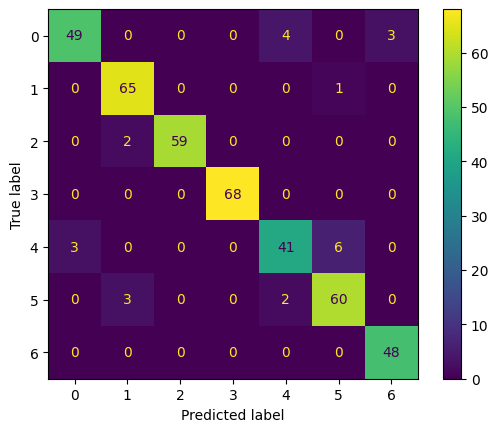

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#KNN

In [70]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64        56
           1       0.77      0.85      0.81        66
           2       0.87      0.98      0.92        61
           3       0.96      1.00      0.98        68
           4       0.62      0.60      0.61        50
           5       0.81      0.68      0.74        65
           6       0.78      0.90      0.83        48

    accuracy                           0.80       414
   macro avg       0.79      0.80      0.79       414
weighted avg       0.80      0.80      0.80       414



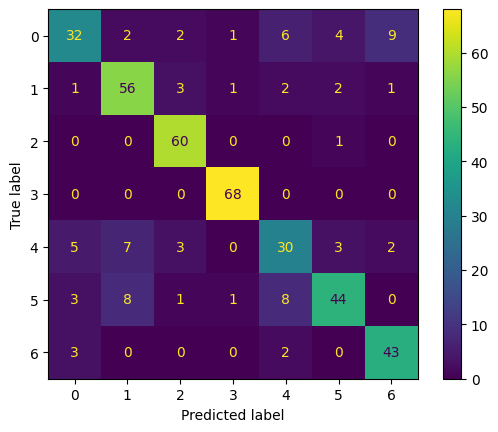

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#svm

In [99]:
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC

In [102]:
svm_classifire = SVC(kernel = 'linear')
svm_classifire.fit(X_train, y_train)
y_pred = svm_classifire.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.8454106280193237


In [82]:
#logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [84]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

In [85]:
yhat = LR.predict(X_test)
yhat

array([6, 3, 3, 2, 2, 0, 2, 3, 3, 2, 1, 2, 3, 2, 1, 3, 1, 2, 2, 6, 3, 1,
       2, 3, 3, 1, 2, 2, 3, 3, 6, 3, 1, 2, 2, 2, 2, 3, 2, 2, 1, 6, 3, 1,
       2, 2, 3, 2, 6, 3, 3, 2, 3, 3, 1, 0, 2, 6, 2, 2, 2, 2, 2, 3, 3, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 6, 2, 3, 3, 3, 3, 3, 0, 2, 2, 2, 1,
       2, 5, 3, 0, 2, 3, 3, 2, 1, 6, 5, 3, 2, 2, 2, 3, 3, 6, 3, 6, 3, 2,
       3, 2, 0, 2, 2, 3, 2, 2, 3, 2, 6, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 6,
       6, 3, 0, 1, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 6, 2, 3, 6, 3, 2,
       6, 6, 2, 3, 2, 2, 3, 3, 2, 2, 3, 6, 6, 2, 2, 2, 3, 3, 2, 2, 1, 2,
       2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 6, 2, 6, 0, 0, 3, 2, 2, 2, 3, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 6, 2, 3, 3, 3, 0, 2, 3, 2, 0, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 3, 2,
       2, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 2, 6, 6, 2, 2, 6, 3, 3, 2, 2,
       6, 1, 2, 2, 3, 2, 6, 2, 2, 2, 3, 0, 2, 6, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 1, 2, 1, 2, 3, 6, 3, 1, 1, 1, 3, 3, 6,

In [104]:
accuracy = accuracy_score(y_test, yhat)
print("accuracy: ", accuracy)

accuracy:  0.4106280193236715
